In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=10000, random_state=42)

In [ ]:
X_train.shape, X_val.shape, X_test.shape

((50000, 28, 28), (10000, 28, 28), (10000, 28, 28))

In [ ]:
X_train = X_train / 255
X_val = X_val /255
X_test = X_test / 255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization


In [ ]:
model = Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(300, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10,batch_size=4, validation_data=(X_val, y_val))

Epoch 1/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 82s 7ms/step - accuracy: 0.9910 - loss: 0.0349 - val_accuracy: 0.9743 - val_loss: 0.2067
Epoch 2/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 78s 6ms/step - accuracy: 0.9908 - loss: 0.0381 - val_accuracy: 0.9782 - val_loss: 0.2223
Epoch 3/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 76s 6ms/step - accuracy: 0.9926 - loss: 0.0342 - val_accuracy: 0.9789 - val_loss: 0.2076
Epoch 4/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 77s 6ms/step - accuracy: 0.9912 - loss: 0.0395 - val_accuracy: 0.9776 - val_loss: 0.2476
Epoch 5/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 78s 6ms/step - accuracy: 0.9927 - loss: 0.0292 - val_accuracy: 0.9760 - val_loss: 0.2690
Epoch 6/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 80s 6ms/step - accuracy: 0.9934 - loss: 0.0320 - val_accuracy: 0.9772 - val_loss: 0.2867
Epoch 7/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 74s 6ms/step - accuracy: 0.9926 - loss: 0.0351 - val_accuracy: 0.9754 - val_loss: 0.2404
Epoch 8/10
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 73s 6ms/step - accuracy: 

In [ ]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss : {loss}')
print(f'Test accuracy : {accuracy*100:4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9713 - loss: 0.3434
Test loss : 0.27730315923690796
Test accuracy : 97.670001


In [ ]:
y_pred[0]

np.int64(7)

In [ ]:
y_test[0]

np.uint8(7)

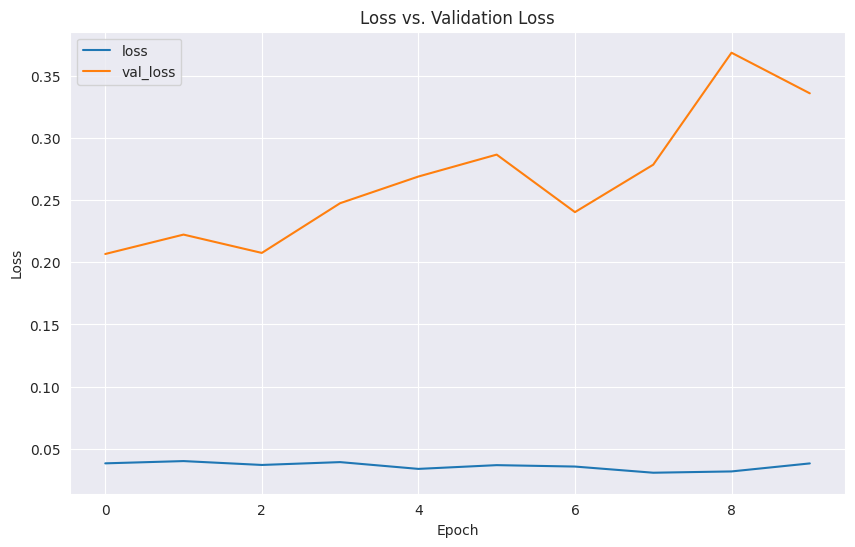

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()